<a href="https://colab.research.google.com/github/jv-mendes07/previsao_churn_rate/blob/main/Previs%C3%A3o_de_Churn_Rate_(Projeto_de_Classifica%C3%A7%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Previsão de Churn Rate (Machine Learning)
### Projeto de Classificação com Rede Neural

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importação de bibliotecas

In [2]:
# Importação de bibliotecas que serão úteis para manipulação, visualização de dados, e para construção da rede neural:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
# Verificação da versão do TensorFlow:

tf.__version__

'2.12.0'

#### Importação de dataset

In [4]:
# Importação do dataset:

df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 8 - Deep Learning/Section 39 - Artificial Neural Networks (ANN)/Python/Churn_Modelling.csv')

In [5]:
# Visualização das cinco primeiras linhas do dataset:

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Tratamento de dados

In [6]:
# Definição da coluna 'RowNumber' como índice do dataset:

df.set_index('RowNumber', inplace = True)

In [7]:
# Reformatação textual do nome das colunas, para que todas às colunas estejam em minúsculo:

df.columns = [x.lower() for x in df.columns]

In [8]:
# Verificação do nome modificado das colunas:

df.columns

Index(['customerid', 'surname', 'creditscore', 'geography', 'gender', 'age',
       'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

In [9]:
# Quantidade de dados nulos em cada coluna do dataset:

df.isna().sum()

customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

#### Análise Exploratória de Dados (EDA)

#### Dicionário de Dados

* **RowNumber**: Identificação numérica da linha
* **customerid**: Identificação numérica do cliente
* **surname**: Sobrenome do cliente
* **creditscore**: Pontuação de crédito do cliente
* **geography**: País do cliente
* **gender**: Gênero do cliente
* **age**: Idade do cliente
* **tenure**: Anos como cliente do banco
* **balance**: Saldo bancário do cliente
* **numofproducts**: Numéro de produtos bancários que o cliente possui
* **hascrcard**: Se o cliente tem cartão de crédito ou não (1 - Sim; 0 - Não)
* **isactivemember**: Um cliente ativo ou não (1 - Sim; 0 - Não)
* **estimatedsalary**: Salário estimado do cliente
* **exited**: Se o cliente deixou de ser cliente do banco ou não (1 - Sim; 2 - Não)

#### Informações preliminares sobre a variável-target

In [10]:
# Quantidade de ex-clientes e clientes atuais do banco:

df.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [11]:
# % de ex-clientes e clientes atuais do banco:

df.exited.value_counts(normalize = True) * 100 

0    79.63
1    20.37
Name: exited, dtype: float64

#### (1) Qual é a média de pontuação de crédito dos clientes que deixaram ou que permaneceram no banco?

In [12]:
# Tipo de dado da variável 'creditscore':

df.creditscore.dtype

dtype('int64')

In [13]:
# Quantidade de valores únicos em tal coluna:

df.creditscore.nunique()

460

In [14]:
# Valores únicos da coluna 'creditscore':

df.creditscore.unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [15]:
# Impressão visual da pontuação mínima e máxima de crédito:

print(f'Menor pontuação de crédito: {df.creditscore.min()}')
print(f'Maior pontuação de crédito: {df.creditscore.max()}')

Menor pontuação de crédito: 350
Maior pontuação de crédito: 850


In [16]:
# Infomações estatísticas sobre a coluna de pontuação de créditos dos clientes bancários:

df.creditscore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: creditscore, dtype: float64

In [17]:
# A média de pontuação de crédito dos clientes atuais e dos ex-clientes do banco:

df.groupby('exited').agg({'creditscore': 'mean'}).round(2)

,creditscore
exited,
0,651.85
1,645.35


In [18]:
# A mediana de pontuação de crédito dos clientes atuais e dos ex-clientes do banco:

df.groupby('exited').agg({'creditscore': 'median'}).round(2)

,creditscore
exited,
0,653.0
1,646.0


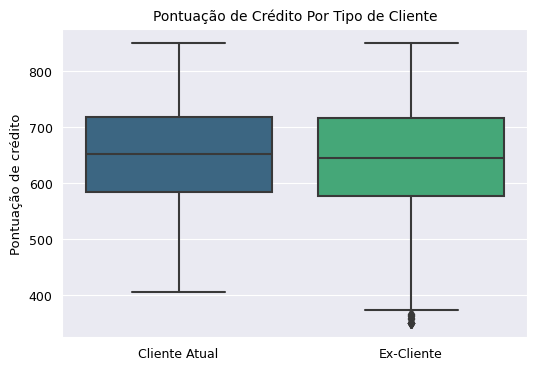

In [19]:
# Distribuição da pontuação de crédito de clientes atuais e ex-clientes:

sns.set_style('darkgrid')
plt.figure(figsize = (6, 4))
sns.boxplot(x = df['exited'],
            y = df['creditscore'],
            palette = 'viridis'
            )
plt.xlabel('')
plt.xticks(ticks = df['exited'].unique(), labels = ['Ex-Cliente', 'Cliente Atual'], fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('Pontuação de crédito', fontsize = 9.5, color = 'k')
plt.title('Pontuação de Crédito Por Tipo de Cliente', fontsize = 10, color = 'k');

#### (2) Qual é nacionalidade de clientes que mais saem ou que mais permanecem como clientes do banco?

In [164]:
# Valores únicos da coluna 'geography':

df.geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
# Quantidade de clientes do banco (clientes atuais; ex-clientes) por país:

df.geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [21]:
# % de clientes do banco (clientes atuais; ex-clientes) por país:

df.geography.value_counts(normalize=True) * 100

France     50.14
Germany    25.09
Spain      24.77
Name: geography, dtype: float64

In [22]:
# Quantidade de clientes por país que são clientes atuais ou ex-clientes do banco:

df_2 = df.groupby(['geography', 'exited']).agg({'exited': 'size'})

In [23]:
# Quantidade de clientes atuais do banco por país: 

df_2.swaplevel().loc[0].sort_values('exited', ascending = False)

,exited
geography,
France,4204
Spain,2064
Germany,1695


In [24]:
# Quantidade de ex-clientes do banco por país: 

df_2.swaplevel().loc[1].sort_values('exited', ascending = False)

,exited
geography,
Germany,814
France,810
Spain,413


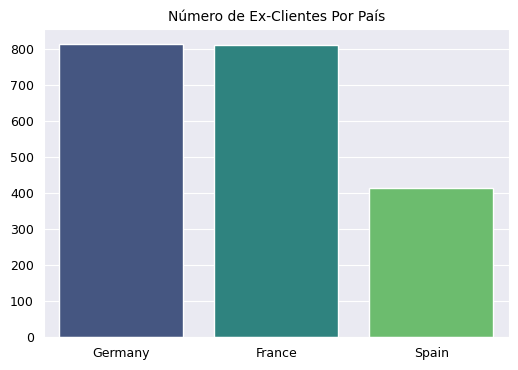

In [25]:
# Gráfico de coluna para expor a quantidade de ex-clientes do banco por país: 

plt.figure(figsize = (6, 4))
sns.barplot(data = df_2.swaplevel().loc[1].sort_values('exited', ascending = False).reset_index(),
            x = 'geography', y = 'exited',  palette = 'viridis')
plt.xlabel('')
plt.xticks(fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Número de Ex-Clientes Por País', fontsize = 10, color = 'k');

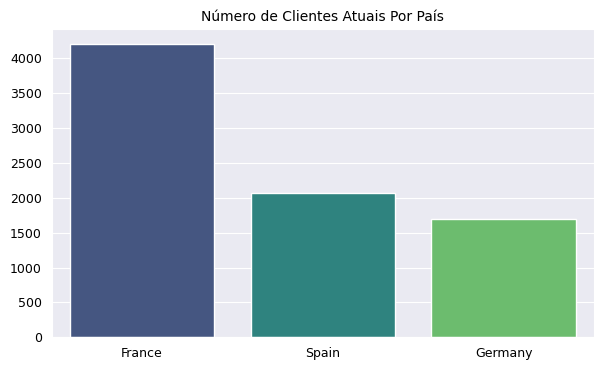

In [26]:
# Quantidade de clientes atuais do banco por país: 

plt.figure(figsize = (7, 4))
sns.barplot(data = df_2.swaplevel().loc[0].sort_values('exited', ascending = False).reset_index(),
            x = 'geography', y = 'exited',  palette = 'viridis')
plt.xlabel('')
plt.xticks(fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Número de Clientes Atuais Por País', fontsize = 10, color = 'k');

#### (3) Qual é a média de pontuação de crédito dos clientes por país?

In [27]:
# Média de pontuação de crédito dos clientes por país:

df.groupby('geography').agg({'creditscore': 'mean'}).round(2)

,creditscore
geography,
France,649.67
Germany,651.45
Spain,651.33


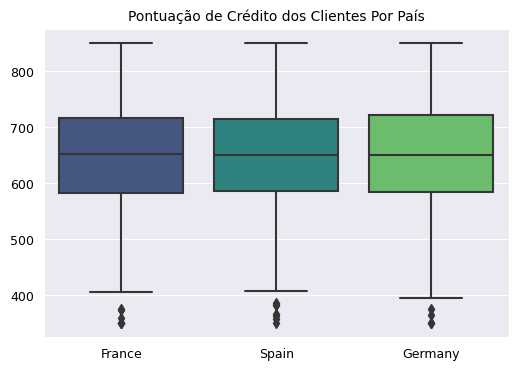

In [28]:
# Distribuição da pontuação de crédito dos clientes por país:

plt.figure(figsize = (6, 4))
sns.boxplot(x = df['geography'],
            y = df['creditscore'],  palette = 'viridis')
plt.xlabel('')
plt.xticks(fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Pontuação de Crédito dos Clientes Por País', fontsize = 10, color = 'k');

#### (4) Qual é o gênero dos clientes que mais saem ou permanecem como clientes do banco?

In [29]:
# Quantidade de valores únicos da coluna 'gender':

df.gender.nunique()

2

In [30]:
# Valores únicos da coluna 'gender':

df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [31]:
# Quantidade de clientes (clientes atuais; ex-clientes) do banco por gênero:

df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [32]:
# % de clientes (clientes atuais; ex-clientes) do banco por gênero:

df.gender.value_counts(normalize = True) * 100

Male      54.57
Female    45.43
Name: gender, dtype: float64

In [33]:
# Quantidade de clientes por gênero que são clientes atuais ou ex-clientes do banco:

df_3 = df.groupby(['gender', 'exited']).agg({'exited': 'size'})

In [34]:
# Tabela com a quantidade de clientes atuais e ex-clientes do banco por gênero:

df_3

exited
gender exited        
Female 0         3404
       1         1139
Male   0         4559
       1          898

In [35]:
# Quantidade de clientes por gênero que são clientes atuais do banco:

df_3.swaplevel().loc[0].sort_values('exited', ascending = False)

,exited
gender,
Male,4559
Female,3404


In [36]:
# Quantidade de clientes por gênero que são ex-clientes do banco:

df_3.swaplevel().loc[1].sort_values('exited', ascending = False)

,exited
gender,
Female,1139
Male,898


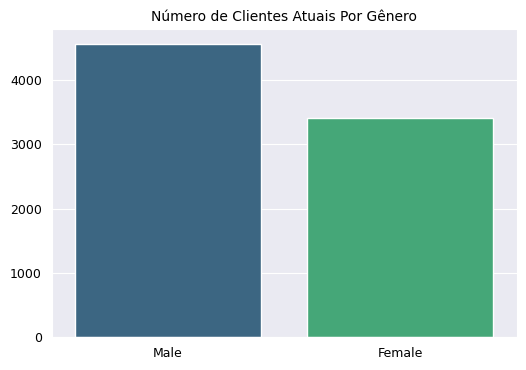

In [37]:
# Gráfico de coluna com a quantidade de clientes por gênero que são clientes atuais do banco:


plt.figure(figsize = (6, 4))
sns.barplot(data = df_3.swaplevel().loc[0].sort_values('exited', ascending = False).reset_index(),
            x = 'gender', y = 'exited',  palette = 'viridis')
plt.xlabel('')
plt.xticks(fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Número de Clientes Atuais Por Gênero', fontsize = 10, color = 'k');

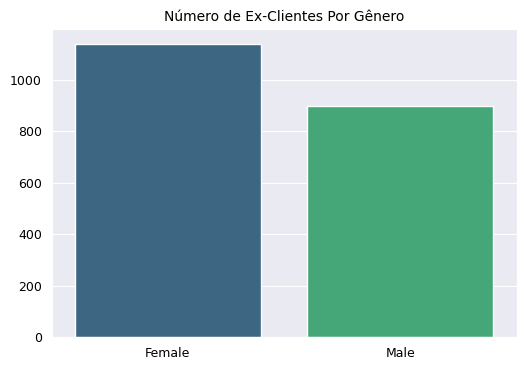

In [38]:
# Gráfico de coluna com a quantidade de clientes por gênero que são ex-clientes do banco:

plt.figure(figsize = (6, 4))
sns.barplot(data = df_3.swaplevel().loc[1].sort_values('exited', ascending = False).reset_index(),
            x = 'gender', y = 'exited',  palette = 'viridis')
plt.xlabel('')
plt.xticks(fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Número de Ex-Clientes Por Gênero', fontsize = 10, color = 'k');

#### (5) Qual é a média de idade dos clientes que permanecem ou que deixam de ser clientes do banco?

In [39]:
# Quantidade de valores únicos na coluna 'age':

df.age.nunique()

70

In [40]:
# Valores únicos da coluna 'age':

df.age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [41]:
# Informações estatísticas e gerais da idade dos clientes do banco:

df.age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

In [42]:
# Informações estatísticas e gerais da idade dos clientes atuais do banco:

df[df['exited'] == 0].age.describe()

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: age, dtype: float64

In [43]:
# Informações estatísticas e gerais da idade dos ex-clientes do banco:

df[df['exited'] == 1].age.describe()

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: age, dtype: float64

In [44]:
# A média de idade dos clientes atuais e dos ex-clientes do banco:

df.groupby('exited').agg({'age': 'mean'}).round(2)

,age
exited,
0,37.41
1,44.84


In [45]:
# Função para calcular o IQR (Intervalo Interquartil), e descobrir outliers em uma distribuição de dados:

def calculo_iqr(x):
  IQR = df[x].quantile(0.75) - df[x].quantile(0.25)
  lim_inf = df[x].quantile(0.25) - (IQR * 1.5)
  lim_sup = df[x].quantile(0.75) + (IQR * 1.5)
  return lim_inf, lim_sup

In [46]:
# IQR da coluna 'age' para identificar outliers em tal coluna:

calculo_iqr('age')

(14.0, 62.0)

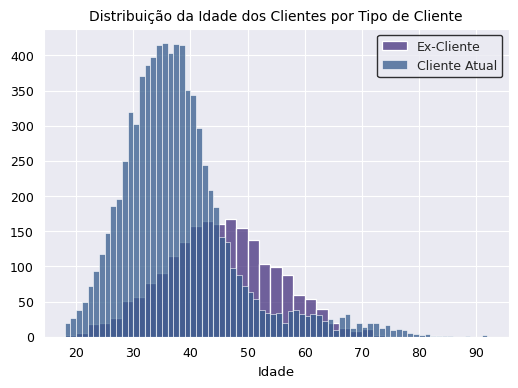

In [48]:
# Histograma com a distribuição de frequência das idades dos clientes atuais e dos ex-clientes do banco:

plt.figure(figsize = (6, 4))

sns.histplot(df[df['exited'] == 1].age, label = 'Ex-Cliente',
             kde = False, color = sns.color_palette('viridis')[0])
sns.histplot(df[df['exited'] == 0].age, label = 'Cliente Atual',
             kde = False, color = sns.color_palette('viridis')[1])

plt.xlabel('Idade', fontsize = 9.5, color = 'k')
plt.xticks( fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Distribuição da Idade dos Clientes por Tipo de Cliente', fontsize = 10, color = 'k')
plt.legend(edgecolor = 'k', fontsize = 9);

#### (6) Quantos anos em média os clientes permanecem como clientes do banco?

In [49]:
# Quantidade de valores únicos na coluna 'tenure':

df.tenure.nunique()

11

In [50]:
# Valores únicos da coluna 'tenure':

df.tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [51]:
# Informações estatísticas e gerais da coluna 'tenure':

df.tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

In [52]:
# A média de duração como clientes bancários dos clientes atuais e dos ex-clientes do banco:

df.groupby('exited').agg({'tenure': 'mean'}).round(2)

,tenure
exited,
0,5.03
1,4.93


In [53]:
# A mediana de duração como clientes bancários dos clientes atuais e dos ex-clientes do banco:

df.groupby('exited').agg({'tenure': 'median'}).round(2)

,tenure
exited,
0,5.0
1,5.0


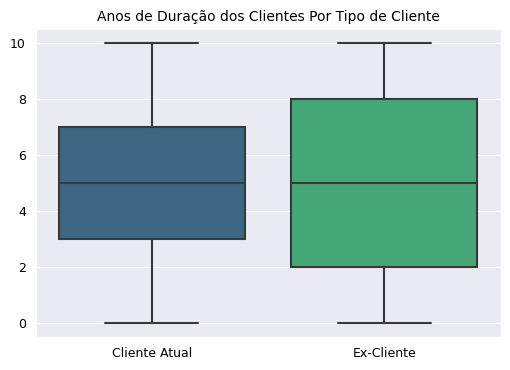

In [54]:
# Gráfico de caixa para expor a distribuição de duração de anos como cliente bancário
# dos clientes atuais e dos ex-clientes do banco:

plt.figure(figsize = (6, 4))
sns.boxplot(x = df['exited'],
            y = df['tenure'], palette = 'viridis')
plt.xlabel('')
plt.xticks(ticks = df['exited'].unique(), labels = ['Ex-Cliente', 'Cliente Atual'], fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Anos de Duração dos Clientes Por Tipo de Cliente', fontsize = 10, color = 'k');

#### (7) Quantos produtos os clientes atuais e os ex-clientes tendem à comprar do banco?

In [55]:
# Quantidade de valores únicos da coluna 'numofproducts':

df.numofproducts.nunique()

4

In [56]:
# Valores únicos da coluna 'numofproducts':

df.numofproducts.unique()

array([1, 3, 2, 4])

In [57]:
# Informações gerais e estatísticas da coluna 'numofproducts':

df.numofproducts.describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: numofproducts, dtype: float64

In [58]:
# Quantidade de produtos bancários que clientes atuais compraram em relação aos ex-clientes:

df.groupby('exited').agg({'numofproducts': 'sum'})

,numofproducts
exited,
0,12297
1,3005


In [59]:
# Mediana de produtos que são comprados por clientes atuais em comparação à ex-clientes do banco:

df.groupby('exited').agg({'numofproducts': 'median'})

,numofproducts
exited,
0,2.0
1,1.0


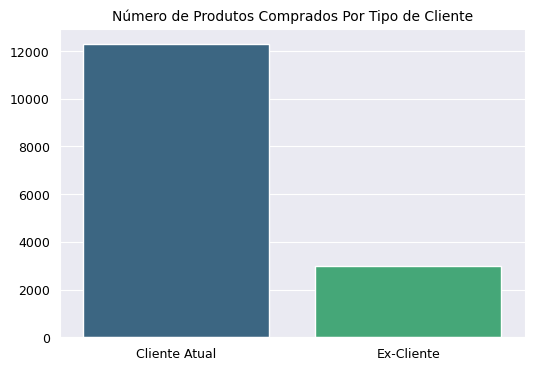

In [60]:
# Gráfico de coluna com a quantidade de produtos comprados por cliente atual e ex-cliente:

plt.figure(figsize = (6, 4))
sns.barplot(data = df.groupby('exited').agg({'numofproducts': 'sum'}).reset_index(),
            x = 'exited', y = 'numofproducts', palette = 'viridis')
plt.xlabel('')
plt.xticks(ticks = df['exited'].unique(), labels = ['Ex-Cliente', 'Cliente Atual'], fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Número de Produtos Comprados Por Tipo de Cliente', fontsize = 10, color = 'k');

#### (8) Os ex-clientes tendiam à ter cartão de crédito como os clientes atuais?

In [61]:
# % de clientes que possuem ou possuiam cartão de crédito do banco:

df.hascrcard.value_counts(normalize = True) * 100

1    70.55
0    29.45
Name: hascrcard, dtype: float64

In [62]:
# Quantidade de clientes atuais que possuem cartão de crédito do banco:
# % de clientes atuais que possuem  cartão de crédito em relação à quantidade de clientes atuais que não possuem cartão de crédito:

df[df['exited'] == 0].groupby('hascrcard').agg({'hascrcard': 'size'}).assign(perc_hascrcard = (df[df['exited'] == 0].groupby(
    'hascrcard').agg({'hascrcard': 'size'}).hascrcard / df[df['exited'] == 0].groupby(
    'hascrcard').agg({'hascrcard': 'size'}).hascrcard.sum() * 100).round(2))

,hascrcard,perc_hascrcard
hascrcard,,
0,2332,29.29
1,5631,70.71


In [63]:
# Quantidade de ex-clientes que possuiam cartão de crédito do banco:
# % de ex-clientes que possuem  cartão de crédito em relação à quantidade de ex-clientes que não possuiam cartão de crédito:

df[df['exited'] == 1].groupby('hascrcard').agg({'hascrcard': 'size'}).assign(perc_hascrcard = (df[df['exited'] == 1].groupby(
    'hascrcard').agg({'hascrcard': 'size'}).hascrcard / df[df['exited'] == 1].groupby(
    'hascrcard').agg({'hascrcard': 'size'}).hascrcard.sum() * 100).round(2))

,hascrcard,perc_hascrcard
hascrcard,,
0,613,30.09
1,1424,69.91


#### (9) Os ex-clientes tendiam à ser clientes ativos do banco?

In [64]:
# Quantidade de clientes ativos e inativos do banco:

df.isactivemember.value_counts()

1    5151
0    4849
Name: isactivemember, dtype: int64

In [65]:
# % de clientes ativos e inativos do banco:

df.isactivemember.value_counts(normalize = True) * 100

1    51.51
0    48.49
Name: isactivemember, dtype: float64

In [66]:
# Tabela com a quantidade de clientes atuais que são ativos ou inativos no banco:

df_4 = df[df['exited'] == 0].groupby('isactivemember').agg({'isactivemember': 'size'})

In [67]:
# Coluna com a % de clientes atuais que são ativos ou inativos no banco:

df_4['perc_activemember'] = (df_4.isactivemember / df_4.isactivemember.sum() * 100).round(2)

In [68]:
# Tabela com a quantidade e a % de clientes atuais ativos e inativos do banco:

df_4

,isactivemember,perc_activemember
isactivemember,,
0,3547,44.54
1,4416,55.46


In [69]:
# Tabela com a quantidade de ex-clientes que são ativos ou inativos no banco:

df_5 = df[df['exited'] == 1].groupby('isactivemember').agg({'isactivemember': 'size'})

In [70]:
# Coluna com a % de ex-clientes que são ativos ou inativos no banco:

df_5['perc_activemember'] = (df_5.isactivemember / df_5.isactivemember.sum() * 100).round(2)

In [71]:
# Tabela com a quantidade e a % de ex-clientes ativos e inativos do banco:

df_5

,isactivemember,perc_activemember
isactivemember,,
0,1302,63.92
1,735,36.08


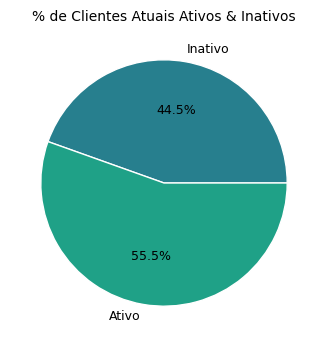

In [72]:
# Gráfico de pizza com a % de clientes atuais ativos ou inativos do banco:

plt.figure(figsize = (6, 4))
plt.pie(df_4.isactivemember, labels= ['Inativo', 'Ativo'], autopct='%1.1f%%',
      textprops = {'fontsize': 9, 'color': 'k'}, colors = sns.color_palette('viridis')[2:])
plt.title('% de Clientes Atuais Ativos & Inativos', fontsize = 10, color = 'k')
plt.show()

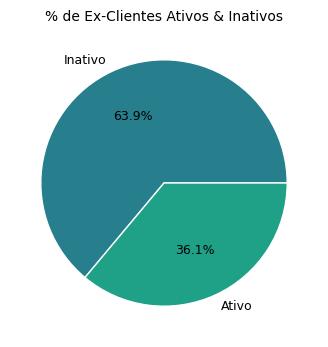

In [73]:
# Gráfico de pizza com a % de ex-clientes ativos ou inativos do banco:

plt.figure(figsize = (6, 4))
plt.pie(df_5.isactivemember, labels= ['Inativo', 'Ativo'], autopct='%1.1f%%',
      textprops = {'fontsize': 9, 'color': 'k'}, colors = sns.color_palette('viridis')[2:])
plt.title('% de Ex-Clientes Ativos & Inativos', fontsize = 10, color = 'k')
plt.show()

#### (10) Há uma diferença salarial significativa entre os clientes atuais e os ex-clientes do banco?

In [74]:
# Quantidade de valores únicos na coluna 'estimatedsalary':

df.estimatedsalary.nunique()

9999

In [75]:
# Informações gerais e estatísticas do salário estimado dos clientes do banco:

df.estimatedsalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimatedsalary, dtype: float64

In [76]:
# Média de salário estimado dos clientes atuais e ex-clientes do banco:

df.groupby('exited').agg({'estimatedsalary': 'mean'}).round(2)

,estimatedsalary
exited,
0,99738.39
1,101465.68


In [77]:
# Mediana de salário estimado dos clientes atuais e ex-clientes do banco:

df.groupby('exited').agg({'estimatedsalary': 'median'}).round(2)

,estimatedsalary
exited,
0,99645.04
1,102460.84


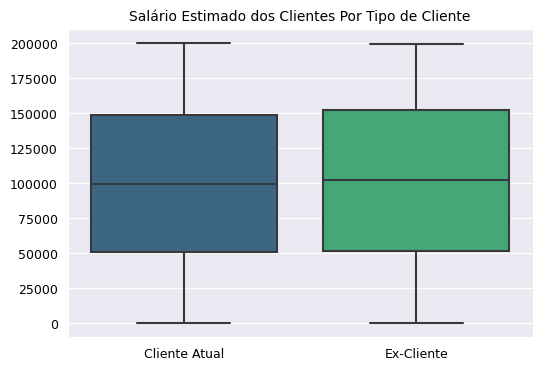

In [78]:
# Distribuição de dados dos salários estimados dos clientes atuais ou ex-clientes do banco:

plt.figure(figsize = (6, 4))
sns.boxplot(x = df['exited'],
            y = df['estimatedsalary'],
            palette = 'viridis')
plt.xlabel('')
plt.xticks(ticks = df['exited'].unique(), labels = ['Ex-Cliente', 'Cliente Atual'], fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.ylabel('')
plt.title('Salário Estimado dos Clientes Por Tipo de Cliente', fontsize = 10, color = 'k');

#### Pré-processamento de Dados

In [110]:
# Variáveis preditoras atribuídas à variável X:

X = df.drop(['customerid', 'surname', 'exited'], axis = 1)

In [111]:
# Variável-target atribuída a variável y:

y = df.iloc[:, -1]

##### Label Encoding

In [112]:
# Importação de método para converter os dados textuais das variáveis categóricas em dados numéricos:

from sklearn.preprocessing import LabelEncoder

In [113]:
# Atribuição do método à variável:

encoder = LabelEncoder()

In [114]:
# Aplicação de Label Encoding sobre a variável 'gênero' para converter 'feminino' em 0 e 'masculino' em 1:

X['gender'] = encoder.fit_transform(X['gender'])

In [115]:
# Verificação da aplicação do Label Encoding:

X.gender

RowNumber
1        0
2        0
3        0
4        0
5        0
        ..
9996     1
9997     1
9998     0
9999     1
10000    0
Name: gender, Length: 10000, dtype: int64

##### One Hot Encoding

In [116]:
# Valores únicos da coluna geography:

X.geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [117]:
# Transformação da variável categórica 'geography' em variáveis dummies de 0's e 1's:
# Concatenação da tabela de variáveis dummy com a tabela original das variáveis preditoras:

X = pd.concat([X, pd.get_dummies(X['geography'], drop_first = True)], axis = 1).drop('geography', axis = 'columns')

In [118]:
# Verificação da criação das novas variáveis dummies: 

X.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,Germany,Spain
RowNumber,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,0,0
2,608,0,41,1,83807.86,1,0,1,112542.58,0,1
3,502,0,42,8,159660.80,3,1,0,113931.57,0,0
4,699,0,39,1,0.00,2,0,0,93826.63,0,0
5,850,0,43,2,125510.82,1,1,1,79084.10,0,1


#### Separação de Dados de Treino & Dados de Teste

In [140]:
# Importação do método para separar os dados em dados de treino e dados de teste:

from sklearn.model_selection import train_test_split

In [141]:
# Separação de dados de treino e dados de teste:
# 20 % dos dados foram separáveis para teste, e 80 % para dados de treino:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature Scaling

In [142]:
# Importação do método para aplicar Feature Scaling nos dados, e coloca-los na mesma escala intervalar:

from sklearn.preprocessing import StandardScaler

In [143]:
# Atribuição de tal método importado à uma nova variável:

scaler = StandardScaler()

In [144]:
# Quantidade de variáveis preditoras da variável X:

X.columns

Index(['creditscore', 'gender', 'age', 'tenure', 'balance', 'numofproducts',
       'hascrcard', 'isactivemember', 'estimatedsalary', 'Germany', 'Spain'],
      dtype='object')

In [145]:
# Aplicação de Feature Scaling sobre os dados de treino:

X_train = scaler.fit_transform(X_train)

In [146]:
# Aplicação de Feature Scaling sobre os dados de teste:

X_test = scaler.transform(X_test)

In [148]:
# Visualização dos dados de treino transformados:

X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.36766974,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ...,  1.6612541 ,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.25280688,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ..., -0.1427649 ,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ..., -0.05082558,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.81456811,
         1.72572313, -0.57638802]])

In [149]:
# Visualização dos dados de treino transformados:

X_test

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -1.01960511,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  0.79888291,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.72797953,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ..., -1.16591585,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ..., -0.41163463,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ...,  0.12593183,
         1.72572313, -0.57638802]])

#### Construção da Rede Neural Artificial (ANN)

##### Inicialização da ANN

In [150]:
# Inicialização da rede neural artificial:

ann = tf.keras.models.Sequential()

##### Adição da camada de entrada e a primeira camada oculta da ANN

In [151]:
# Criação da camada de entrada e da camada oculta da rede neural artificial:

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

##### Adição da segunda camada oculta da ANN

In [152]:
# Criação de mais uma camada oculta na rede neural:

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

##### Adição da camada de saída da ANN

In [153]:
# Criação da camada de saída da rede neural com a função sigmóide como função ativadora
# para retornar uma probabilidade preditiva das classificações sobre a variável-target:

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

#### Treinamento da rede neural artificial (ANN)

##### Compilação da ANN

In [154]:
# Compilação da rede neural, com aplicação do gradiente descendente estocástico para ajustar os pesos sinápticos
# e uso da taxa de acurácia como métrica de avaliação da performance do modelo:

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

##### Treinamento da ANN

In [155]:
# Treino da rede neural artificial sobre um lote de 32 dados dos dados de treino
# em 100 épocas de ajuste de pesos da rede neural:

ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5559 - accuracy: 0.7563
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7931
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7968
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8033
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8081
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8127
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8165
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8174
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3723 - accura

### Teste de acurácia da rede neural artificial (ANN)

In [156]:
# Importação da confusão de matriz e da pontuação de acurácia para avaliar a performance da rede neural artificial: 

from sklearn.metrics import confusion_matrix, accuracy_score

In [157]:
# Previsão da variável-target sobre os dados de teste com a ANN criada:

y_pred = ann.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [158]:
# Atribuição de 1 para predições probabílisticas acima de 0.5, e atribuição de 0 para 
# predições de probabilidade abaixo de 0.5:

y_pred = np.where(y_pred > 0.5, 1, 0)

In [159]:
# Acurácia preditiva final da rede neural treinada:

accuracy_score(y_test, y_pred)

0.8605

In [160]:
# Criação de uma confusão de matriz:

cm = confusion_matrix(y_test, y_pred)

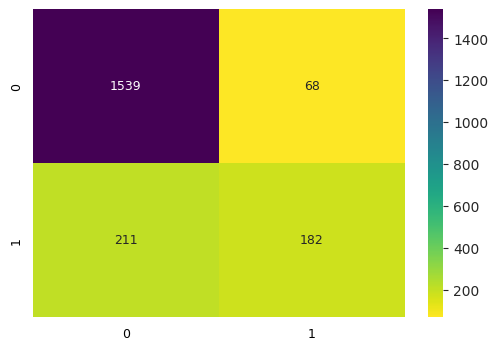

In [161]:
# Confusão de matriz com a quantidade de acertos e erros preditivos da rede neural treinada:

plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt='', annot_kws = {'fontsize': 9}, cmap = 'viridis_r')
plt.xticks(fontsize = 9, color = 'k')
plt.yticks(fontsize = 9, color = 'k')
plt.show()

#### **Previsão de um caso hipotético**

Preveja se um cliente hipotético deixará de ser cliente do banco ou não, dada às seguintes informações:

* **Geography**: Alemanha
* **Credit Score**: 600
* **Gender**: Feminino
* **Age**: 45 anos
* **Tenure**: 5 anos
* **Balance**: 50000
* **Number of products**: 1
* **Has credit card?**: Sim
* **Is Active Member**: No
* **Estimated Salary**: 50000

In [163]:
# Previsão de um caso hipotético com a rede neural treinada:

print(ann.predict(scaler.transform([[600, 0, 45, 5, 50000, 1, 1, 0, 60000, 1, 0]])))

1/1 [==============================] - 0s 23ms/step
[[0.8321922]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Uma cliente alemã de 45 anos, com uma pontuação de crédito de 600, com 5 anos de duração como cliente do banco, 50.000 dólares na conta bancária, somente 1 produto adquirido, usuária de cartão de crédito, membro ativo do banco e com um salário estimado de 50.000 dólares, apresenta uma probabilidade de 83 % de deixar de ser cliente do banco!

# FIM